#  Exploratory Data Analysis on a Kaggle Dataset

In this project, I will first try to understand a Kaggle dataset, then clean it and finally, Analyze the relationship between various variables.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

First, let's retrieve and understand the data:

In [4]:
data=pd.read_csv(r'C:\Users\HP\Downloads\StudentsPerformance.csv')

In [5]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [8]:
data.shape

(1000, 8)

In [10]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [14]:
#lrts see how many unique values are there in each column
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [17]:
#let us see the gender distribution
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [18]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

We can do similarly for all columns. Now we have an idea of how the data looks like.

Let's Clean the data now!

In [20]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

looks like there are no nulls in here! Cool Dataset!

In [22]:
#However, there is a bit of redundancy which does not provide useful information
#lets remove the redundant columns which do not have anything to do with the performance
student=data.drop(['race/ethnicity','parental level of education'],axis=1)

In [23]:
student.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


Now, let's go for relationship analysis



In [24]:
student.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


It seems that the grades are highly correlated. i.e. students having a high grade in one course, tend to have good scores in other courses as well.

<AxesSubplot:>

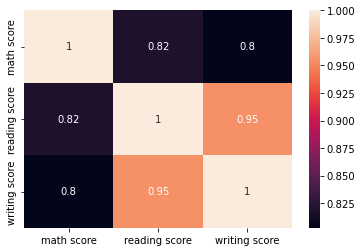

In [26]:
#let's plot a heat map using seaborn!

correlation=student.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

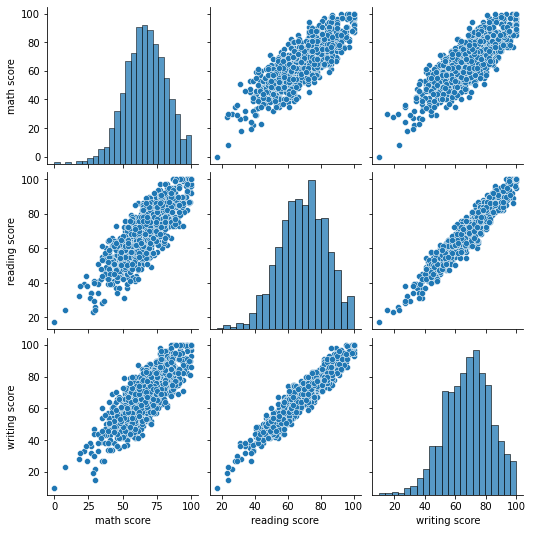

In [28]:
sns.pairplot(student)

The above-plotted diagrams also visually approve the hypothesis of 'course grades are highly correlated'. Now let's take a look at how gender can affect the grade?

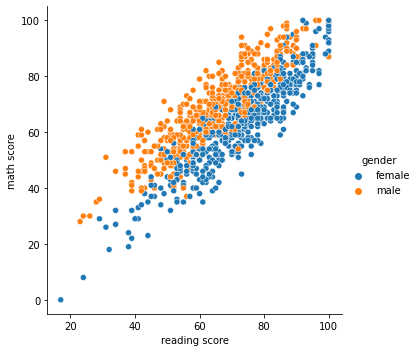

In [31]:
sns.relplot(x='reading score', y='math score', hue='gender',data=student)

It seems that it has some visible impact! Males have higher math scores and females have received higher reading scores on average.

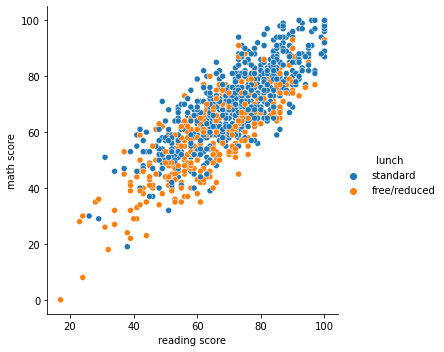

In [32]:
#let's also do some logically stupid analyze and see the result!
#let's see the effect of lunch prices on scores!
sns.relplot(x='reading score', y='math score', hue='lunch',data=student)

it does not show a meaningful difference! But it seems that the free/reduced price lunch are a little bit more prone to receive lower grades!

This could be useful information for the advertisement of supplementary courses for different students based on their gender.

Now, let's plot a few histograms!

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

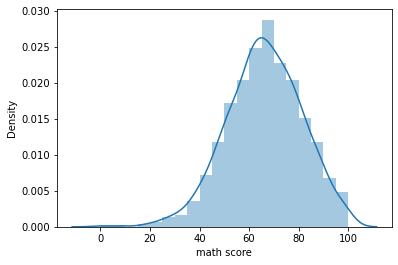

In [42]:
sns.distplot(student['math score'],bins=20)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='writing score', ylabel='Density'>

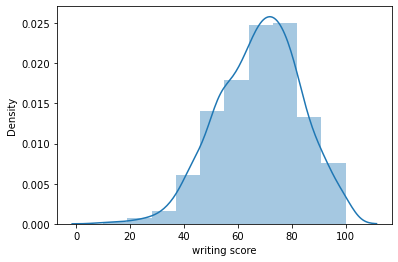

In [44]:
sns.distplot(student['writing score'],bins=10)

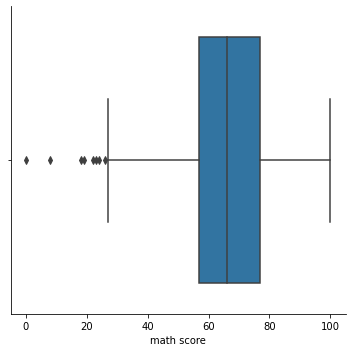

In [47]:
sns.catplot(x='math score',kind='box',data=student)

We can see that most sudents get 60 to 80. So, another useful advertising insight! In case of advertisement of a supplementary class, the advertisement should say: "WE HELP YOU TO RAISE FROM 70 TO 90!"